___

<a href='http://www.pieriandata.com'> <img src='../../Pierian_Data_Logo.png' /></a>
___

# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

**Import pandas as pd.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read Salaries.csv as a dataframe called sal.**

In [2]:
sal = pd.read_csv('3.1.5.1 Salaries.csv')

**Check the head of the DataFrame.**

In [7]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [8]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

In [9]:
sal['BasePay'].mean()

66325.4488404877

**What is the highest amount of OvertimePay in the dataset ?**

In [10]:
sal['OvertimePay'].max()

245131.88

**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [11]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

**How much does JOSEPH DRISCOLL make (including benefits)?**

In [14]:
sal[sal['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [18]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [19]:
sal[sal['TotalPayBenefits'] == sal['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**

In [23]:
sal.groupby(['Year'])['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

In [25]:
sal['JobTitle'].nunique()

2159

**What are the top 5 most common jobs?**

In [28]:
sal['JobTitle'].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [3]:
(sal[sal['Year']==2013]['JobTitle'].value_counts() == 1).sum()

202

**How many people have the word Chief in their job title? (This is pretty tricky)**

In [16]:
sal['JobTitle'].apply(lambda x: True if 'chief' in x.lower().split() else False).sum()

477

**Bonus: Is there a correlation between length of the Job Title string and Salary?**

In [72]:
j = sal['JobTitle'].apply(lambda x: len(x))

In [73]:
k = sal['TotalPayBenefits']

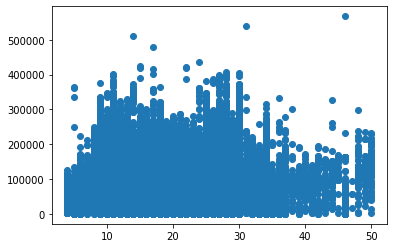

In [74]:
plt.plot(j,k,'o')

<h3 style="color:blue">Correlation</h3>

In [3]:
sal.corr()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
Id,1.000000,-0.204878,-0.081505,-0.100403,-0.348957,-0.211478,-0.092190,0.968171,NaN,NaN
BasePay,-0.204878,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751,NaN,NaN
OvertimePay,-0.081505,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887,NaN,NaN
OtherPay,-0.100403,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499,NaN,NaN
Benefits,-0.348957,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136,NaN,NaN
TotalPay,-0.211478,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090,NaN,NaN
TotalPayBenefits,-0.092190,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947,NaN,NaN
Year,0.968171,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000,NaN,NaN
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


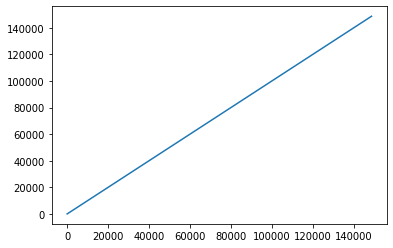

In [4]:
plt.plot(sal['Id'], sal['Id'])

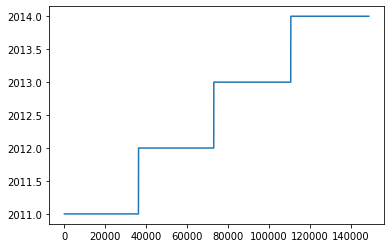

In [5]:
plt.plot(sal['Id'], sal['Year'])

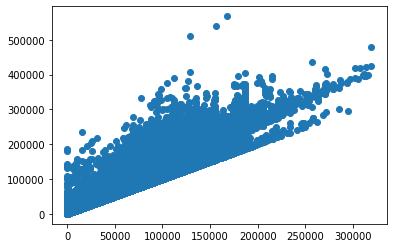

In [6]:
plt.plot(sal['BasePay'], sal['TotalPayBenefits'], 'o')

In [7]:
sal[['BasePay']].corrwith(sal['TotalPayBenefits'])

BasePay    0.946595
dtype: float64

In [8]:
len_ = sal['JobTitle'].apply(len)

In [9]:
sal[['TotalPayBenefits']].corrwith(len_)

TotalPayBenefits   -0.036878
dtype: float64

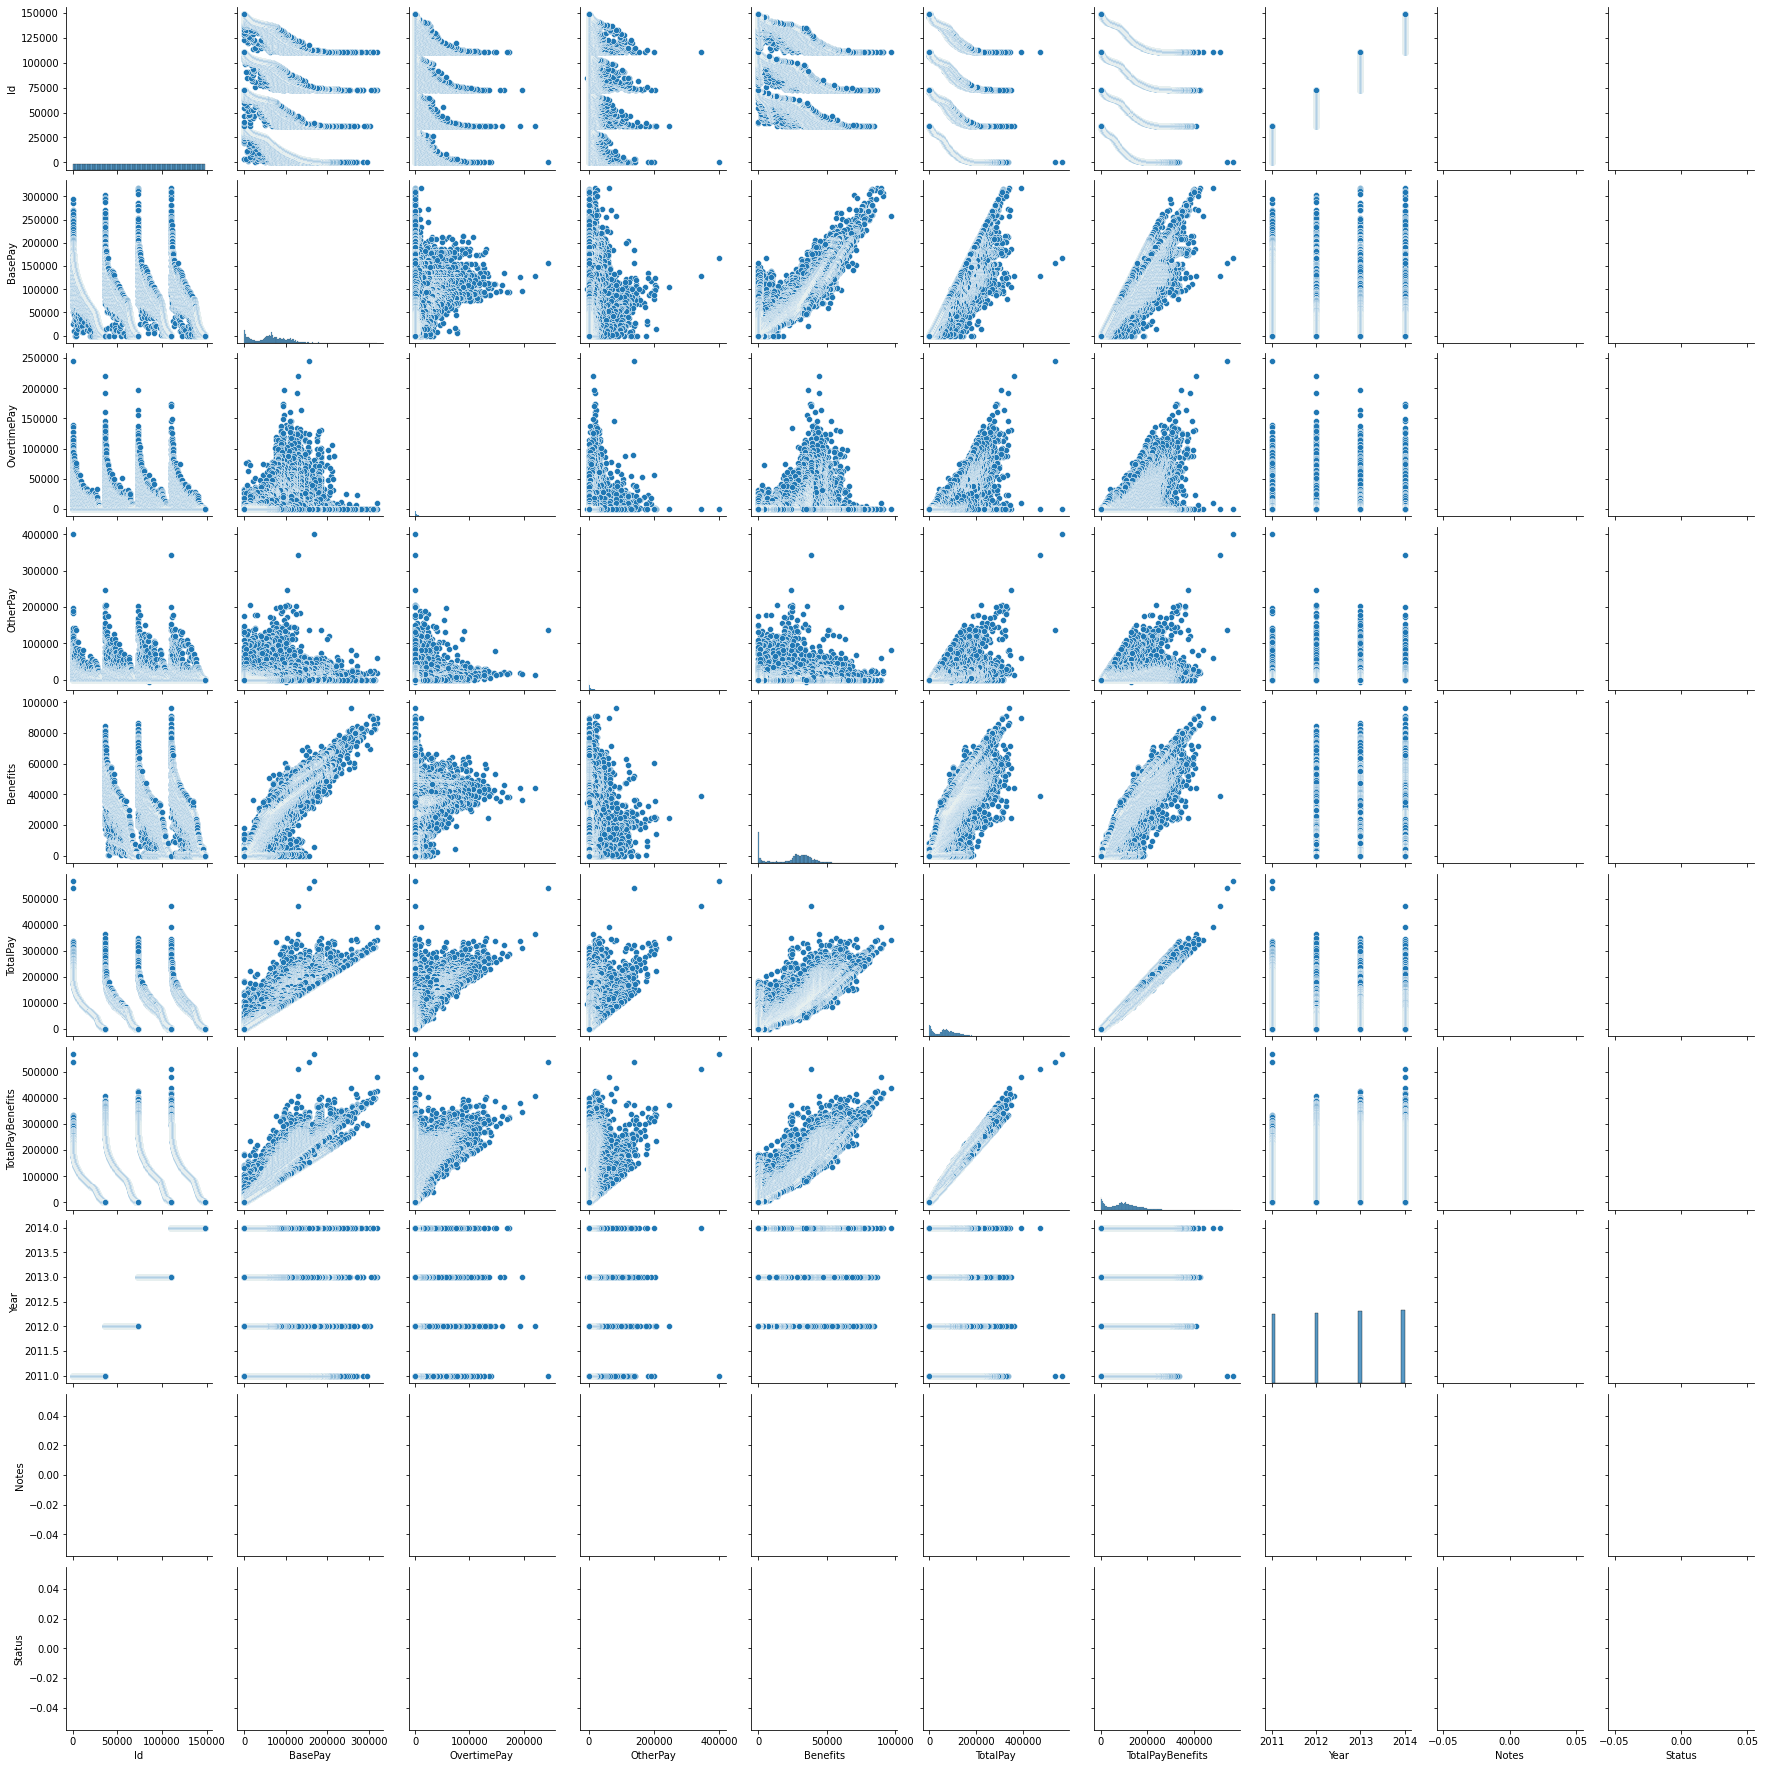

In [12]:
sns.pairplot(sal)

<h2 style="color:blue"> BONUS: Create your own question and answer it</h2>

In [3]:
sal

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


### 1.) Total EmployeeName occur more than 5 times

In [9]:
(sal.groupby(['EmployeeName'])['JobTitle'].value_counts() >5).sum()

3

### 2.) How many Total unique Agency are there

In [10]:
sal['Agency'].nunique()

1

### 3.) TotalPayBenefits in Year 2011 

In [12]:
sal[sal['Year']==2011]['TotalPayBenefits'].sum()

2594195051.88

### 4.) How many EmployeeName is not provided

In [18]:
sal[sal['EmployeeName']=='Not provided']['EmployeeName'].value_counts()

Not provided    4
Name: EmployeeName, dtype: int64